# RMSE Evolution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from reco_systems.filter import filter_df
from reco_systems.CF_knn import calc_similarity_matrix, get_KNN
from reco_systems.user_game_matrix import get_matrix_user_game
from reco_systems.evaluation import *

In [2]:
folder = "database_cleaned"
avis_clean  = pd.read_csv(f"{folder}/avis_clean.csv", index_col=0)
jeux_clean  = pd.read_csv(f"{folder}/jeux_clean.csv", index_col=0)
users       = pd.read_csv(f"{folder}/users.csv", names=["Username", "User id"])

In [3]:
# Filter for min_reviews for users & games
min_reviews = 10
rev_filter = filter_df(avis_clean, min_reviews)

11201 10549
2086 2464
1800 2399
1792 2397
1791 2396


In [4]:
# generate user-game matrix
matrix_ratings, mask_ratings, users_table, games_table = get_matrix_user_game(rev_filter)

In [5]:
# cosine similarity matrix, set k = sqrt(nb users)
cos_sim_matrix = calc_similarity_matrix(matrix_ratings, mask_ratings, "cos")
k = int(np.sqrt(cos_sim_matrix.shape[0]))
cos_sim_matrix

array([[0.        , 0.92389562, 0.83575481, ..., 0.9283455 , 0.95303296,
        1.        ],
       [0.92389562, 0.        , 0.71397509, ..., 1.        , 0.98901438,
        0.99191515],
       [0.83575481, 0.71397509, 0.        , ..., 0.98078965, 0.91075622,
        1.        ],
       ...,
       [0.9283455 , 1.        , 0.98078965, ..., 0.        , 1.        ,
        1.        ],
       [0.95303296, 0.98901438, 0.91075622, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.99191515, 1.        , ..., 1.        , 1.        ,
        0.        ]], shape=(1791, 1791))

In [6]:
 # Create association - User matrix index - User real id - Count reviews

users_ids =  rev_filter[["User id", "Game id"]].groupby("User id", as_index=True).count()
assoc = users_table.to_frame().merge(users_ids, left_on="User id", right_index=True).reset_index()
assoc.columns = ["User index", "User id", "Count reviews"]
assoc 

,User index,User id,Count reviews
0,0,0,38
1,1,1,724
2,2,2,330
3,3,3,255
4,4,4,12
...,...,...,...
1786,1786,9066,16
1787,1787,9433,20
1788,1788,9583,13
1789,1789,9596,15


In [ ]:
df = calc_RMSE_MAE_mean(np.array([8,9,10,11,12,13,14,15]),assoc,200,1000,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="cos")
df

8
9
10
11
12
13
14
15


,User id,K,Type,Value
1,3,8,RMSE,1.6935326176666754
2,93,8,RMSE,0.6666666666666661
3,98,8,RMSE,1.908024113715159
4,161,8,RMSE,nan
5,166,8,RMSE,nan
...,...,...,...,...
796,2857,15,MAE,nan
797,2859,15,MAE,nan
798,2877,15,MAE,nan
799,2994,15,MAE,nan


<Axes: xlabel='K', ylabel='Value'>

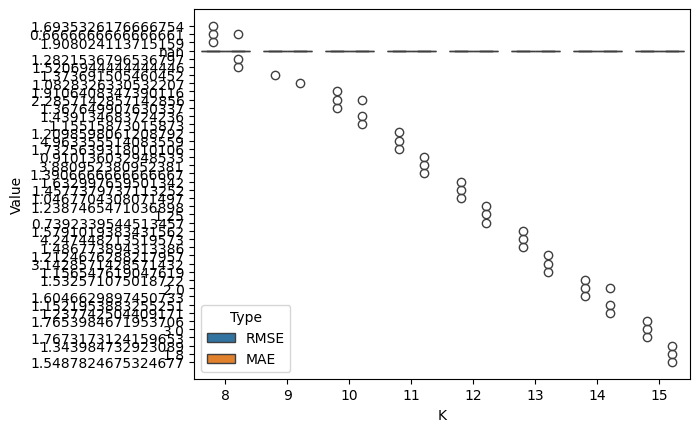

In [10]:
sns.boxplot(df,x="K",y="Value",hue="Type")